In [1]:
import numpy as np  # For numerical computations and array handling
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns 


In [2]:
airbnb_df=pd.read_csv(r'C:\Users\Prasad\OneDrive\Desktop\UPGRAD\A\csv\AB_NYC_2019.csv')

In [3]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:

# Dataset Rows & Columns count
shape=airbnb_df.shape
print('No. of rows =',shape[0])
print('No. of columns =',shape[1])

No. of rows = 48895
No. of columns = 16


In [5]:

# Dataset Info
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Dataset Duplicate Value Count
airbnb_df.duplicated().sum()

np.int64(0)

In [7]:
# Missing Values/Null Values Count
for i in airbnb_df.columns.tolist():
  if airbnb_df[i].isnull().sum()>0:
    print(f'missing values in {i} column is {airbnb_df[i].isnull().sum()}')
     

missing values in name column is 16
missing values in host_name column is 21
missing values in last_review column is 10052
missing values in reviews_per_month column is 10052


In [8]:

# Visualizing the missing values
# Calculate the percentage of missing values in each column
missing_percentage = (airbnb_df.isnull().sum())
missing_percentage

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Insights Till now:
#### noticed that many columns contain null values. The columns 'last_review' and 'reviews_per_month' have the highest number of nulls, while 'name' and 'host_name' have the fewest.
#### The fact that 'last_review' and 'reviews_per_month' have NaN values in the same rows suggests a correlation between these two columns. As 'last_review' seems less crucial when 'reviews_per_month' is available, we can drop it and replace NaN values in 'reviews_per_month' with 0.
#### 'name' and 'host_name' have a small number of NaN values, we can cautiously replace them with 'unknown' in both columns


## Understanding Your Variables

In [10]:
airbnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


#### Id: Unique ID assigned to each listing.

1.Name: Name of the listing.

2.host id: Unique ID assigned to each host.

3.host name: Name of the host.

4.neighbourhood group: Location or grouping of neighborhoods.

5.neighborhood: Specific area or neighborhood of the listing.

6.latitude: Latitude range of the listing's location.

7.longitude: Longitude range of the listing's location.

8.room type: Type of listing (e.g., entire home/apartment, private room, shared room).

9.rice: Price of the listing for a night's stay.

10.minimum nights: Minimum number of nights required to book the listing.

11.Number of reviews: Total number of reviews received for the listing.

12.last review: Content of the last review for the listing.

13.reviews per month: Average number of reviews received per month.

14.calculated host listing count: Total count of listings managed by the host.

15.availability 365: Number of days the listing is available for booking throughout the year.

In [11]:
# Check Unique Values for each variable.
for i in airbnb_df.columns.tolist():
  print(f'Number of unique values in {i} are : {airbnb_df[i].nunique()}')
     

Number of unique values in id are : 48895
Number of unique values in name are : 47905
Number of unique values in host_id are : 37457
Number of unique values in host_name are : 11452
Number of unique values in neighbourhood_group are : 5
Number of unique values in neighbourhood are : 221
Number of unique values in latitude are : 19048
Number of unique values in longitude are : 14718
Number of unique values in room_type are : 3
Number of unique values in price are : 674
Number of unique values in minimum_nights are : 109
Number of unique values in number_of_reviews are : 394
Number of unique values in last_review are : 1764
Number of unique values in reviews_per_month are : 937
Number of unique values in calculated_host_listings_count are : 47
Number of unique values in availability_365 are : 366


### Data Wrangling

In [22]:
airbnb_df.drop_duplicates(inplace=True)                                              # This removes duplicate rows if any, which in turn eliminates data duplicacy.

airbnb_df.fillna({'reviews_per_month':0}, inplace=True)                              # We will fill all NaN with 0 as it doesn't have any review in few of the months

airbnb_df["name"].fillna("unknown", inplace=True)                                    # We will replace NaN with "unknown"

airbnb_df["host_name"].fillna("unknown", inplace=True)                               # We will replace NaN with "unknown"

edit = airbnb_df["price"].mean()                                                     # Will calculate the mean price

airbnb_df.replace(0, edit, inplace=True)                                             # Will then replace price 0 with mean value

airbnb_df.isna().sum()     

C:\Users\Prasad\AppData\Local\Temp\ipykernel_39552\3011825141.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_df["name"].fillna("unknown", inplace=True)                                    # We will replace NaN with "unknown"
C:\Users\Prasad\AppData\Local\Temp\ipykernel_39552\3011825141.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermedia

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

###  Data Vizualization

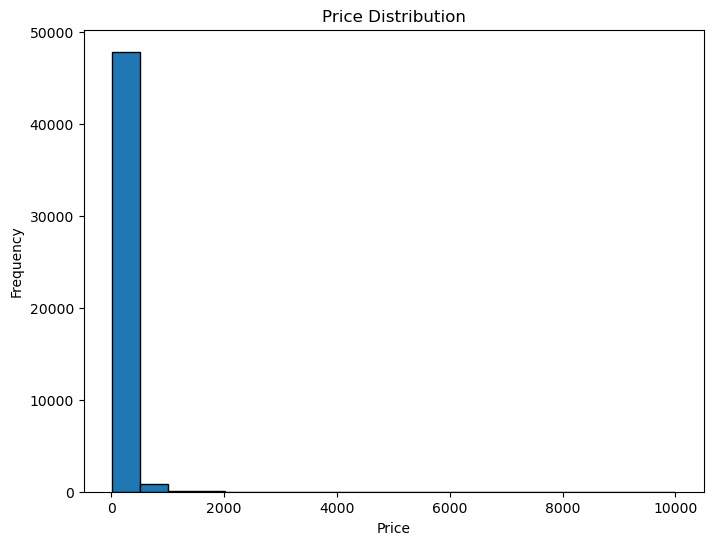

In [25]:
# Chart - 1 Explore Price Distribution (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(airbnb_df['price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

#### The histogram shows that most listings have prices concentrated in certain price ranges, with a few outliers on the higher end.

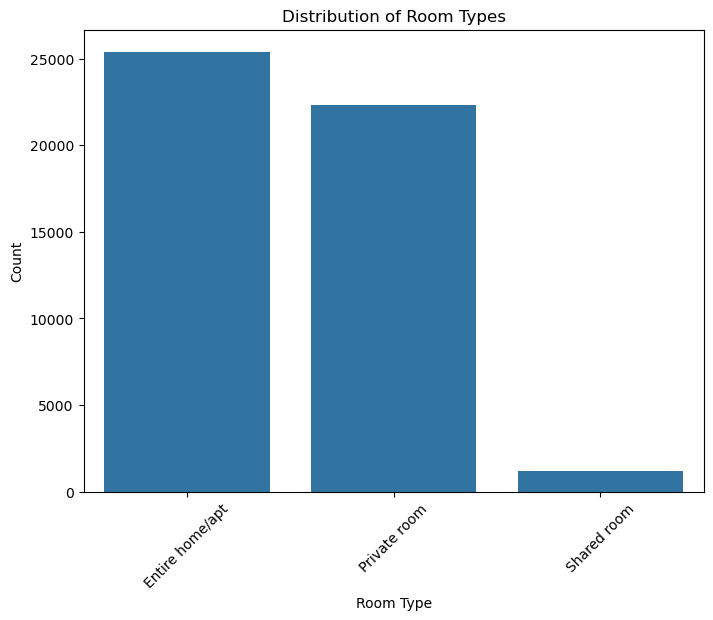

In [26]:
# Chart - 2 visualization code
# Analyze Room Types (Bar Plot)
plt.figure(figsize=(8, 6))
room_type_counts = airbnb_df['room_type'].value_counts()
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Distribution of Room Types')
plt.xticks(rotation=45)
plt.show()


#### The bar plot reveals the number of listings for each room type, with 'entire home/apartment' being the most common type.

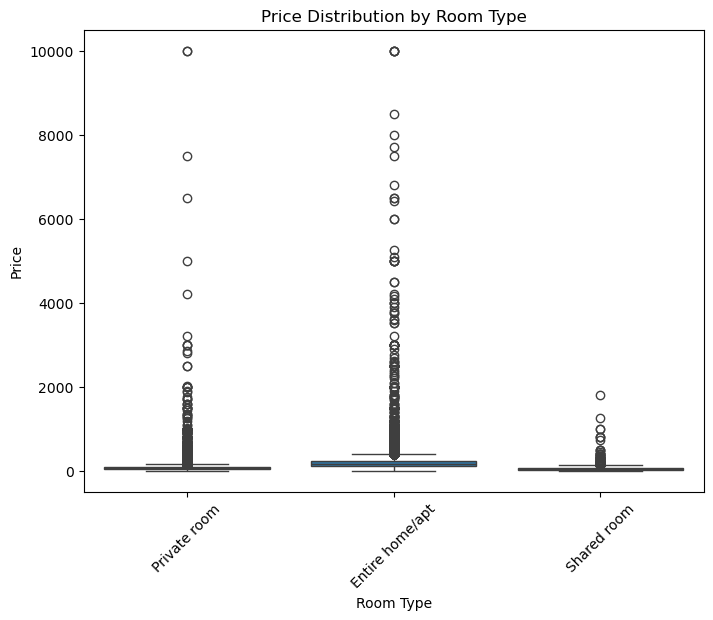

In [27]:

# Chart - 3 visualization code
# Price Distribution by Room Type (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=airbnb_df)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Distribution by Room Type')
plt.xticks(rotation=45)
plt.show()
     

#### The box plot illustrates the price distribution for each room type, highlighting variations and potential pricing trends.

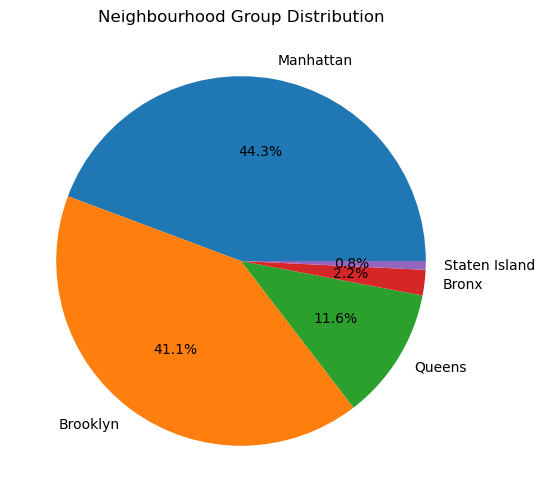

In [28]:
# Chart - 4 visualization code
# Percentage Distribution of Neighbourhood Groups (Pie Chart)
plt.figure(figsize=(8, 6))
neighbourhood_group_counts = airbnb_df['neighbourhood_group'].value_counts()
plt.pie(neighbourhood_group_counts, labels=neighbourhood_group_counts.index, autopct='%1.1f%%')
plt.title('Neighbourhood Group Distribution')
plt.show()

#### The pie chart presents the proportion of listings in each neighbourhood group, providing a quick overview of their relative sizes.

<Figure size 1000x800 with 0 Axes>

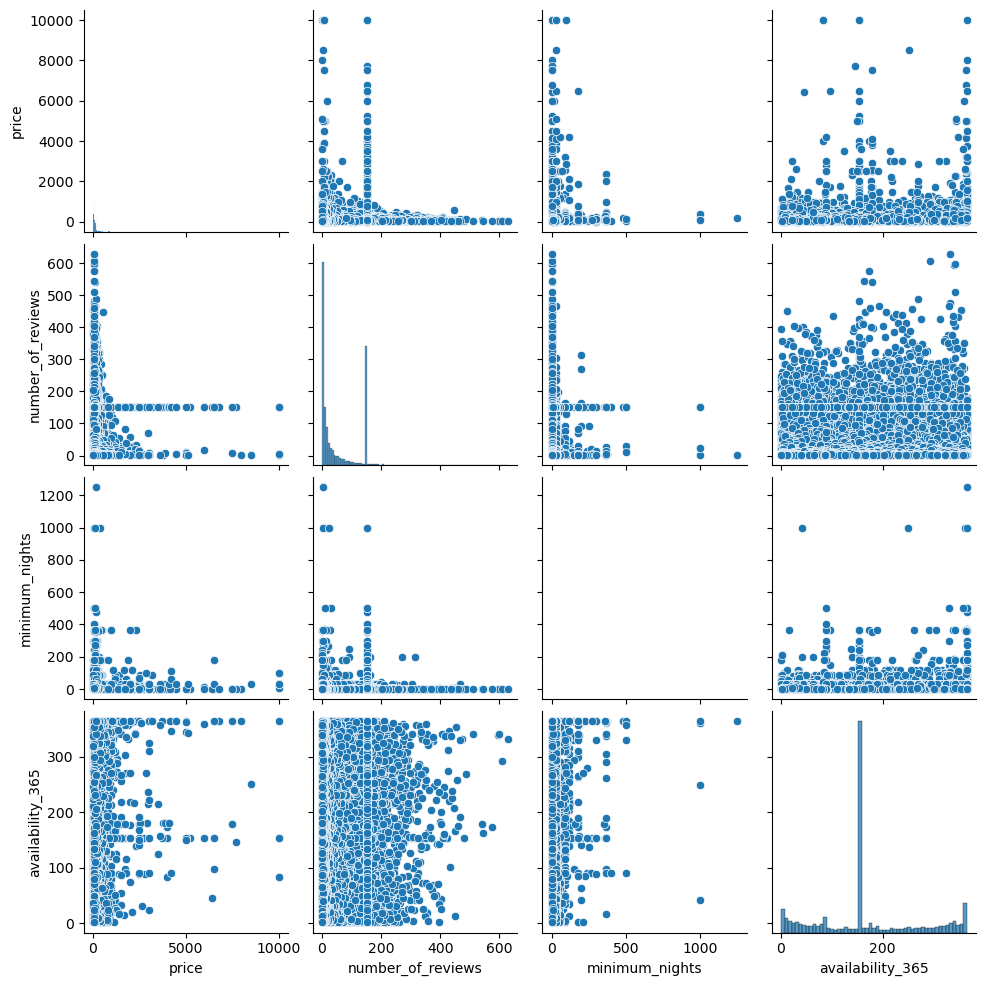

In [31]:


# Chart - 5 visualization code
#  Pair Plot for Numerical Variables
plt.figure(figsize=(10, 8))
sns.pairplot(airbnb_df[['price', 'number_of_reviews', 'minimum_nights', 'availability_365']])
plt.show()
     

#### The pair plot shows scatter plots between selected numerical variables, providing a glimpse of their correlations.

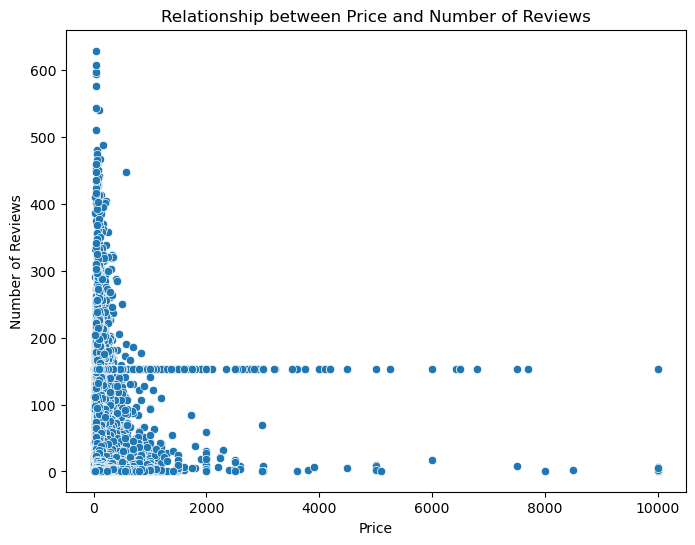

In [32]:
# Chart - 6 visualization code
# Relationship between Price and Number of Reviews (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=airbnb_df)  # Correct the column name here
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Price and Number of Reviews')
plt.show()

#### The scatter plot indicates whether there is any connection between listing prices and the number of reviews they received.

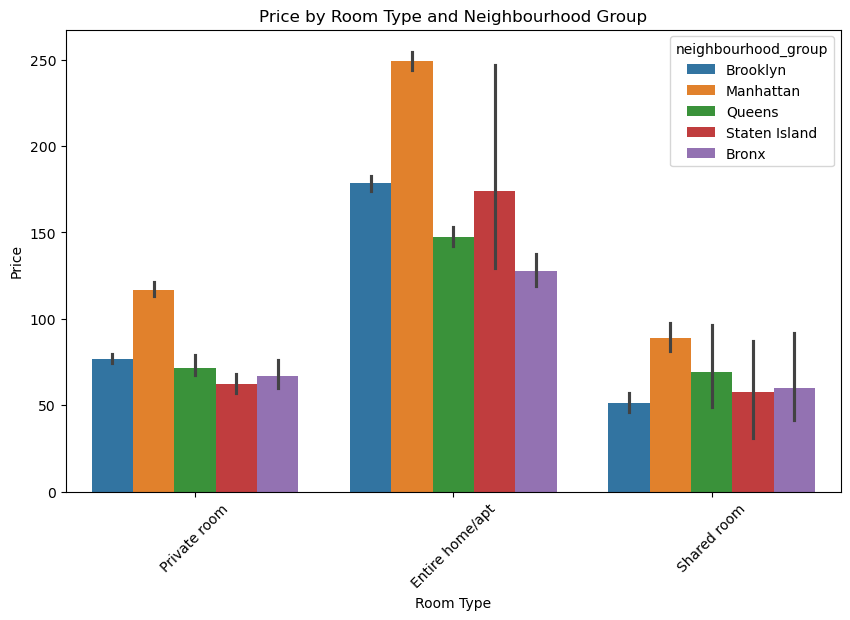

In [34]:


# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', hue='neighbourhood_group', data=airbnb_df)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price by Room Type and Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

#### The plot allows for a quick comparison of prices for each room type within different neighbourhood groups.

C:\Users\Prasad\AppData\Local\Temp\ipykernel_39552\1402647829.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=airbnb_df, ci=None)


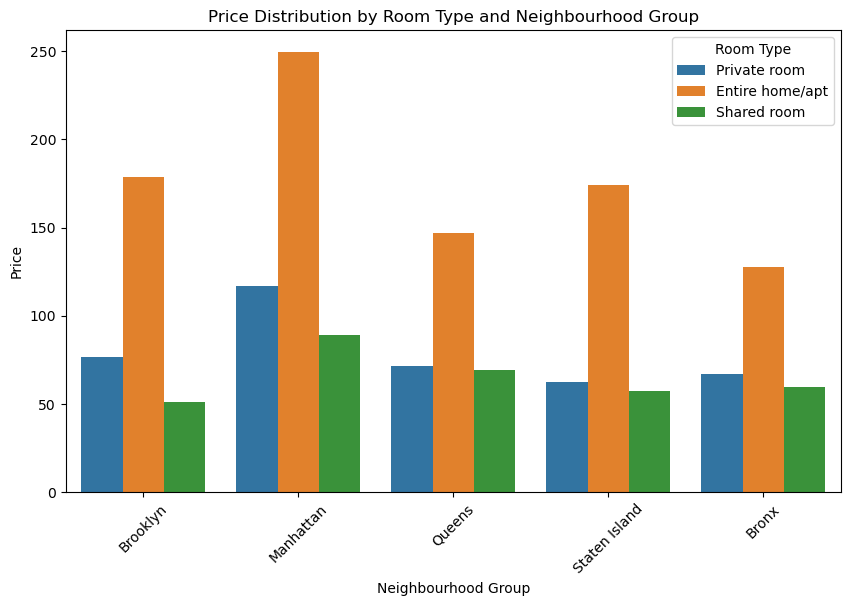

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=airbnb_df, ci=None)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.title('Price Distribution by Room Type and Neighbourhood Group')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

#### The Grouped Bar Plot provides a clear comparison of average prices across neighbourhood groups and room types.

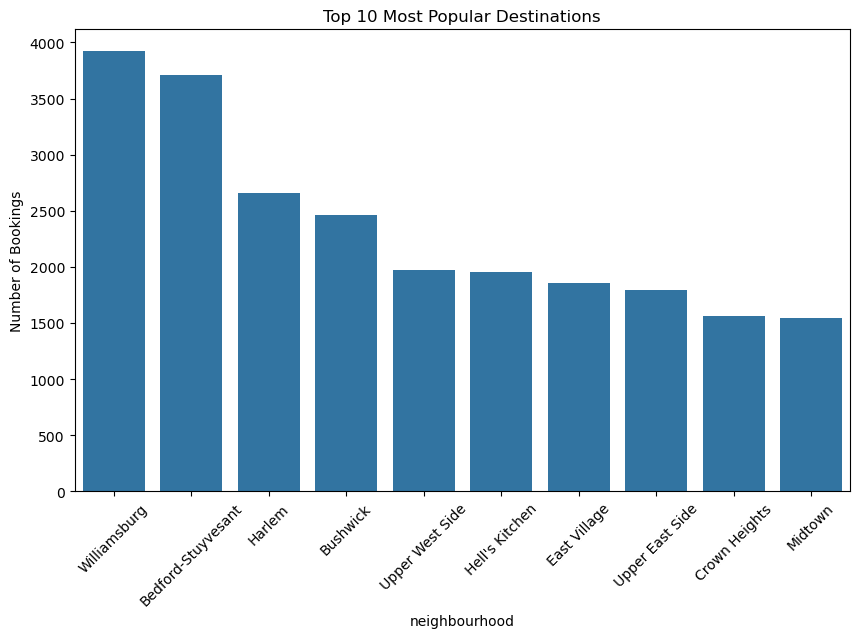

In [36]:
plt.figure(figsize=(10, 6))
popular_destinations = airbnb_df['neighbourhood'].value_counts().head(10)
sns.barplot(x=popular_destinations.index, y=popular_destinations.values)
plt.xlabel('neighbourhood')
plt.ylabel('Number of Bookings')
plt.title('Top 10 Most Popular Destinations')
plt.xticks(rotation=45)
plt.show()

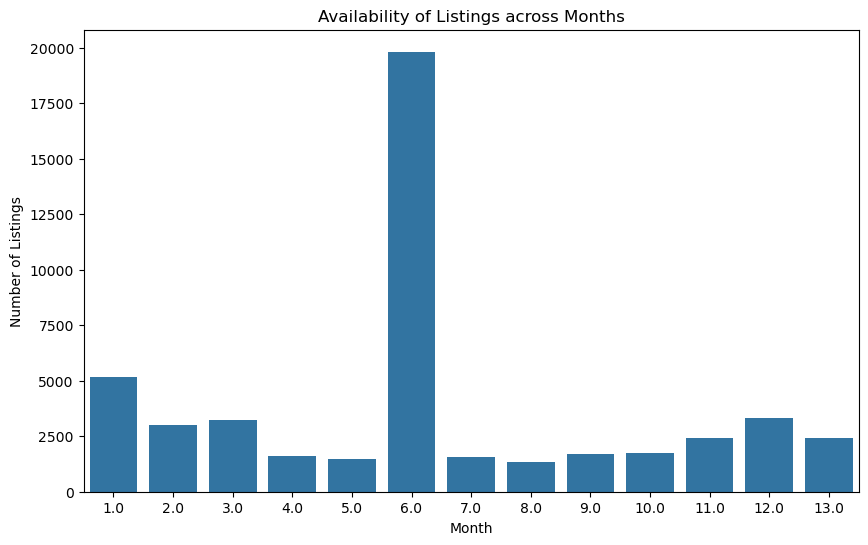

In [37]:

# Extract month from the 'availability 365' column
airbnb_df['month'] = airbnb_df['availability_365'].apply(lambda x: (x // 30) + 1)

# Plot Availability of Listings across Months
plt.figure(figsize=(10, 6))
availability_counts = airbnb_df['month'].value_counts().sort_index()
sns.barplot(x=availability_counts.index, y=availability_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Listings')
plt.title('Availability of Listings across Months')
plt.show()

#### The 'entire home/apartment' room type was the most popular, representing the highest number of listings. Focusing on this room type can attract a larger customer base.